![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE WAVES ARCTIC TRAINING
<div style="text-align: right"><i> 02-01-WAV </i></div>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
  - [2.1. Model description](#2.1.-Model-description)
  - [2.2. Get more info on the product](#2.2.-Get-more-info-on-the-product)
  - [2.3. Parameters used for downloading the data](#2.3.-Parameters-used-for-downloading-the-data)
- [3. Required Python modules](#3.-Required-Python-modules)
- [4. Explore the netCDF file content](#4.-Explore-the-netCDF-file-content)
- [5. Waves condition during a storm in December 2019](#5.-Waves-condition-during-a-storm-in-December-2019)
    - [5.1. Select the netCDF file and variable name](#5.1.-Select-the-netCDF-file-and-variable-name)
    - [5.2. Map the significant wave height conditions](#5.2.-Map-the-significant-wave-height-conditions)
    - [5.3. Map the significant wave height conditions with wave direction](#5.3.-Map-the-significant-wave-height-conditions-with-wave-direction)
    - [5.4. Gif animation](#5.4.-Gif-animation)
        - [5.4.1. Creation of maps](#5.4.1.-Creation-of-maps)
        - [5.4.2. GIF animation creation](#5.4.2.-GIF-animation-creation)
- [6. Exercise 2: Wave evolution during the year 2019 in three points](#6.-Exercise-2:-Wave-evolution-during-the-year-2019-in-three-points)
    - [6.1. Import module](#6.1.-Import-module)
    - [6.2. Select the netCDF file and variable name](#6.2.-Select-the-netCDF-file-and-variable-name)
    - [6.3. Set the configuration](#6.3.-Set-the-configuration)
    - [6.4. Plot the wave rose](#6.4.-Plot-the-wave-rose)
    - [6.5. Plot the time series](#6.5.-Plot-the-time-series)
- [7. Conclusion](#7.-Conclusion)
  



# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

Since the polar ice surface decreases from year to year, the Arctic Ocean is very concerned by maritime transport with the opening of new route options. The sea conditions are also changing with the extension of the sea-ice-free surface waters combined with strong winds, favouring the generation of waves. In this context, the objective of this exercise is to use the Copernicus Marine Service (CMEMS) Wave products to visualize waves during a storm event and during the whole year 2019 at three particular points of a potential future route in the Arctic Ocean.

In particular, you will learn:
- how to handle and explore NetCDF files;
- how to map the waves;
- how to make Gif animations;
- how to plot time series;
- how to plot wave roses.

 

# 2. About the data

[Go back to the "Table of contents"](#Table-of-contents)

## 2.1. Model description

This exercise is based on the product [ARCTIC OCEAN WAVE ANALYSIS AND FORECAST](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_ANALYSIS_FORECAST_WAV_002_014)

The Arctic Ocean Wave Analysis and Forecast system uses the WAM model at 3 km resolution forced with surface winds and boundary wave spectra from the ECMWF (European Centre for Medium-Range Weather Forecasts) together with currents and ice from the ARC MFC analysis (Sea Ice concentration and thickness). WAM runs twice daily providing one hourly 10-day forecast and one hourly 5-day forecast. From the output variables the most commonly used are significant wave height, peak period and mean direction.

<img src="img/ARCTIC_OCEAN_ANALYSE_FORECAST_WAV_002_014_table.png">

## 2.2. Get more info on the product
1. You can find more info on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_ANALYSIS_FORECAST_WAV_002_014)
<br><br>
2. For detailed information about the product, please consult the document: [Product User Manual (PUM)](docs/ProductUserManuals/CMEMS-ARC-PUM-WAV-002-014.pdf)
<br><br>
3. For information about the quality of the product, please consult the document: [Quality Information Document (QUID)](docs/QualityInformationDocuments/CMEMS-ARC-QUID-WAVE-002-014.pdf)

## 2.3. Parameters used for downloading the data

The products used in the notebook have been downloaded ahead of the training session and are stored in the `data/` folder. 

If you wish to download the data yourself, please be sure to have a CMEMS User credentials. Otherwise you can get them <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">here</a>.

You will find below the parameters used to download each dataset from the CMEMS portal:
- **dataset-wam-arctic-1hr3km-be_1602063804667.nc :**   dimension (time:96, x:1173, y:1167 ) -> hourly means during storm in December 2019

- **dataset-wam-arctic-1hr3km-be_1601988020124.nc :**   1 point (lat= 70.75, lon= 18.59) -> hourly means for year 2019

- **dataset-wam-arctic-1hr3km-be_1597742527052.nc :**   1 point (lat= 70.39, lon= 57.72) -> hourly means for year 2019

- **dataset-wam-arctic-1hr3km-be_1597757552880.nc :**   1 point (lat= 77.71, lon= 99.86) -> hourly means for year 2019


<div class="alert alert-block alert-warning">

<b> TIP </b> 

***Tutorial on product downloading***

If you need guidance about the different services for downloading CMEMS products, please check this [tutorial](
https://marine.copernicus.eu/tutorials/how-to-download-products-service-release-septembre-2015/)

# 3. Required Python modules

[Go back to the "Table of contents"](#Table-of-contents)

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **os** | [operating system interfaces](https://docs.python.org/3.7/library/os.html) (manage paths, create directories...) |
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **basemap** |[The basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps. |
| **datetime** | [Datetime](https://docs.python.org/3.7/library/datetime.html) module is useful to easily manipulate dates. |
| **pandas** | [Pandas](https://pandas.pydata.org/) is a fast and powerful data analysis and manipulation tool.


<div class="alert alert-block alert-success"

<b> Importing modules </b>
* Unlike MATLAB, Python libraries need to be *imported* before they can be used
* Imported libraries usually have a namespace
* Portions of libraries, can be imported

In [1]:
#### Import libraries ####
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime
import pandas as pd

# to avoid warning messages
import warnings
warnings.filterwarnings('ignore')

### Install the needed Python modules (for local installation, can be skipped during Training)

The requested python librairies have been installed on the CMEMS JupyterHub ahead of this training session. Hence no installation is needed during the session. If you wish to replay this notebook later on your own infrastructure, you may need to check your python version and install the python librairies used in this Notebook. The following part gives you hints on setting up the approriate environment for this Notebook to run smoothly.

**Requirement: Python version 3.7**

Check your Python version:

In [ ]:
!python --version

If needed you can install the right Python version in this way:
```
conda install python=3.7
```

If you are using the standard *Anaconda3* installation, you can install the needed modules executing the following command in a new cell:
```
conda install numpy xarray matplotlib basemap netcdf4 basemap-data-hires
```

Then, as requested, please restart the kernel.

The kernel maintains the state of a notebook's computations. You can reset this state by restarting the kernel. This is done by clicking on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> in the toolbar above.

# 4. Explore the netCDF file content
[Go back to the "Table of contents"](#Table-of-contents)
 
 We are going to work with the hourly dataset of the analysis and forecast wave product over the Arctic Ocean: [ARCTIC_ANALYSIS_FORECAST_WAV_002_014](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_ANALYSIS_FORECAST_WAV_002_014). In particular, we will use the dataset: DATASET-WAM-ARCTIC-1HR3KM-BE.  

We are going to use file **dataset-wam-arctic-1hr3km-be_1602063804667.nc** to get started with Python features.

Let's check the content of the Arctic analysis and forecast wave product. For this, we need to define:
- `RootPath`: the path pointing to the data directory
- `FName`: the path of the NetCDF file (`Rootpath`+filename.nc) 

These variables can of course be changed later on depending on the netCDF filename and where the data is stored. 

In [ ]:
### Define your data directory Rootpath and your filename FName
RootPath = 'data/'
FName = RootPath + 'dataset-wam-arctic-1hr3km-be_1602063804667.nc'

Now that we have told Jupyter which data we are going to work with and where it is, we need to open this data.
The following cell opens the netCDF file (`xr.open_dataset()` function) and allows you to interactively browse the content of the file. 

In [ ]:
## Open and browse the file
xr.open_dataset(FName)

You can access the **attributes** of a variable by clicking on the **Show/Hide Attribute button** and you can access the **data representation** of a variable by clicking on the **Show/Hide data repr button**. Both buttons are located in the most right column of the product browser.

Now, to store the file content into an xarray Dataset `FIn` and print the content of the dataset, you need to execute the following cell:

In [ ]:
#### Open the netCDF file with xr.open_dataset() and get general information ####

## File
FIn = xr.open_dataset(FName);   #Handling of the netCDf file

# Show Header: global attributes
FIn.info

A NetCDF file is a common way of storing scientific data. 
It contains:
- The **dimensions** of the data (here time,latitude and longitude);
- Several **variables** depending on one or more of these dimensions;
- General information about the product (**global attributes**).

In [ ]:
####  If you want to store one attribute in a variable (for example "institution"):
institution=FIn.attrs['institution']
print(institution)

In [ ]:
###  Print the different variables of a netCDF file ###
FIn.data_vars

This function displays all the available variables in one product along with the dimensions they depend on and their data type (`float32` here, meaning that each values is a float coded on 32 bits). You can see that the present variables in the files depend on several coordinates. To get information about these coordinates:

In [ ]:
###  Print the coordinates of a netCDF file ###
FIn.coords

To get information about the product dimensions:

In [ ]:
###  Print the dimensions of a netCDF file ###
FIn.dims

If you want to store the values of a variable in an array, type MyArray = FIn.variable.values. For example for the time variable:


In [ ]:
###  Store only the values in a variable ###
VarTime=FIn.time.values

If you want to check the content of `Myarray` type `print(Myarray)`. For example for `VarTime`:

In [ ]:
### Print the content of the array variable ###
print(VarTime)

Another way of displaying raw information about the NetCDF file is to use the `ncdump -h`command.

<div class="alert alert-block alert-warning">
    
**TIPS**  
When calling a linux command from a notebook, insert a `!` at the beginning of the command line.

In [ ]:
### Use a linux command line to display information about the NetCDF file
!ncdump -h $FName

As you can see, the `ncdump -h`command line displays the same kind of information as `xr_dataset.info` python code.
A difference worth to be noted is that in the analysis products over the Arctic Ocean, the command line shows that the time variable is stored as `seconds since 1970-01-01 00:00:00`. This unit is not easily readable by a human. `xr.open_dataset` conveniently interprets the time coordinate as a date YYYY-MM-DDTHH:mm:ss when ingesting the product.

# 5. Waves condition during a storm in December 2019
[Go back to the "Table of contents"](#Table-of-contents)

Now that we have learned how to open and manipulate a NetCDF file, it would be nice to visualize the content of the product onto a map. The variables of interest in the studied dataset are geographical variables. 
In this exercise, we will plot maps during a storm event in December 2019. We will display maps every 6 hours and then we will make a GIF animation.

## 5.1. Select the netCDF file and variable name

In this exercise, we will have a closer look at the **significant wave height** variables. 

The wave model products contain 4 types of significant wave height information:
- **VHM0**: Spectral significant wave height (**Hm0**)
- **VHM0_WW**: Spectral significant **wind** wave height
- **VHM0_SW1**: Spectral significant **primary swell** wave height
- **VHM0_SW2**: Spectral significant **secondary swell** wave height

For this exercise, we only use VHM0, which represents the global significant wave height. However it can be interesting to look at the other variables (VHM0_WW, VHM0_SW, VHM0_SW2) to better understand which processes are at stakes during the considered period of time (wind waves or swell?). 

To limit the size of the file, only the VHM0 data was downloaded for the exercise but you can download the rest of the dataset later if you wish to make further analyses.

To map the data, we need to define:
- `VarName`: the name of the variable of interest in the netCDF file
- `VarShortName`: The short name of the variable, to put in the map title

In [2]:
### Open the NetCDF file and select the variables

## Define the path of the file to open 
RootPath = 'data/'

# Wave model file
FName = RootPath + 'dataset-wam-arctic-1hr3km-be_1602063804667.nc'
print(FName)

## Define the name of the variables of interest for the exercise
VarNameVHM0='VHM0'
VarNameDir= 'VMDR'

## Open the netCDF file with xr.open_dataset and store the dataset in FIn
FIn = xr.open_dataset(FName); 

## Store the variables of interest in individual arrays
VarVHM0=FIn[VarNameVHM0]#Get the variable VarName and associated coordinates and attributes
VarDir=FIn[VarNameDir]

print('VarVHM0',VarVHM0)  #Browse the resulting xarray dasaset


## Define short names for the variables
VarVHM0_shortname='SWH'

## Store the coordinates in separate variables 
Time=FIn.time.values
Lon=FIn.lon.values
Lat=FIn.lat.values
rlon=FIn.rlon.values
rlat=FIn.rlat.values
print('Time',Time)

# Create output dir to save plots
PathOut = 'out/Maps_during_storm'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('Plots folder:', PathOut)


data/dataset-wam-arctic-1hr3km-be_1602063804667.nc
VarVHM0 <xarray.DataArray 'VHM0' (time: 96, rlat: 1167, rlon: 1173)>
[131413536 values with dtype=float32]
Coordinates:
  * rlat     (rlat) float64 -3.634e+06 -3.631e+06 ... -1.39e+05 -1.36e+05
    lon      (rlat, rlon) float64 ...
  * time     (time) datetime64[ns] 2019-11-29 ... 2019-12-02T23:00:00
  * rlon     (rlon) float64 2.82e+05 2.85e+05 2.88e+05 ... 3.795e+06 3.798e+06
    lat      (rlat, rlon) float64 ...
Attributes:
    long_name:      Spectral significant wave height (Hm0)
    standard_name:  sea_surface_wave_significant_height
    units:          m
    grid_mapping:   projection_stere
    _ChunkSizes:    [   1   44 2467]
Time ['2019-11-29T00:00:00.000000000' '2019-11-29T01:00:00.000000000'
 '2019-11-29T02:00:00.000000000' '2019-11-29T03:00:00.000000000'
 '2019-11-29T04:00:00.000000000' '2019-11-29T05:00:00.000000000'
 '2019-11-29T06:00:00.000000000' '2019-11-29T07:00:00.000000000'
 '2019-11-29T08:00:00.000000000' '2019-11-

In [3]:
## Close the FIn dataset to free memory
FIn.close()

## 5.2. Map the significant wave height conditions

We are going to plot the variable of interest from the hourly dataset every 6 hours, on 1 figure with 1 subplot per date.

The main functions used in the following cell to generate a plot are:

- `plt.subplots(M,N)`: plots the data on M by N subplots on the figure. The dimensions of the figure are defined by `figsize(width,height)` in inches. A subplot is called an `axe` and the axe properties can be defined independently.

- `Basemap()`creates a map background and allows to define all the properties (such as projection, plotting window, coastlines, etc.)

- `pcolormesh()`: creates a pseudocolor plot with a rectangular grid.

- `astype()`: allows to change the `datetime64` object datatype

As we want to plot the variable every 6 hours, we use a loop on the `Time` variable to automate the subplots generation.

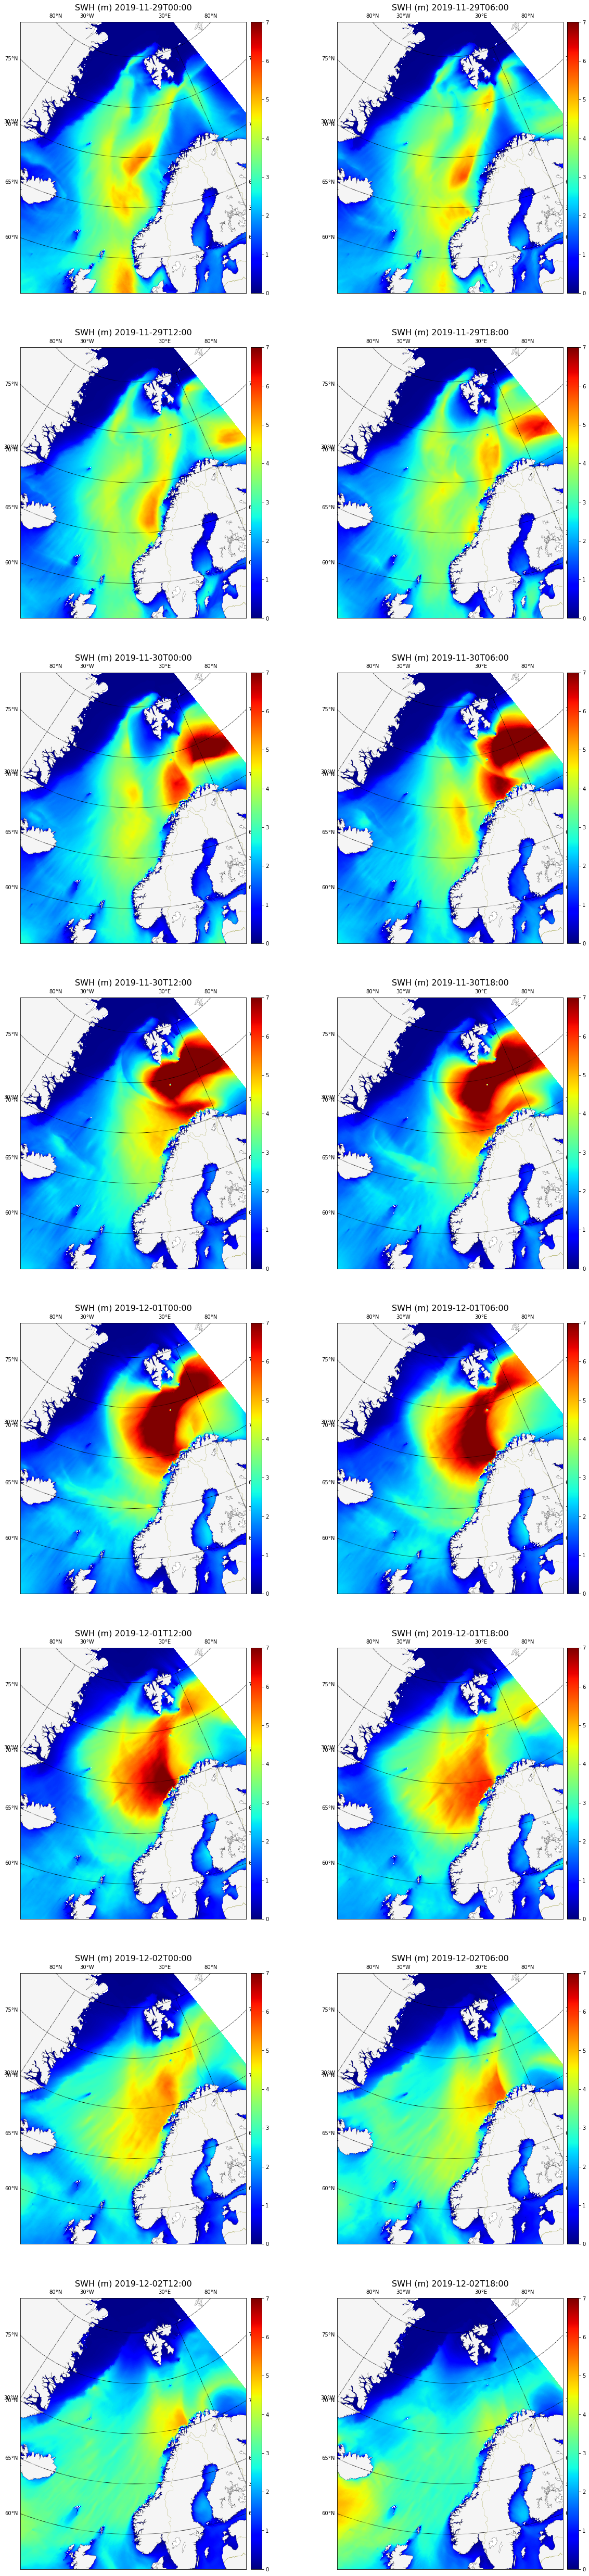

Save file: out/Maps_during_storm/plot_VHM0_every_6_hours.png


In [4]:
#### Plot the data on 1 figure with 1 subplot per date ####

# Define the min/max values for the significant wave height
MinVal=0
MaxVal=7
fig, axes = plt.subplots(8,2, figsize=(20,90))
axes = axes.ravel()

#Loop on the dates to plot the data
for ti in range(int(len(Time)/6)):  # the int() method returns an integer object from any number or string.

    axe=axes[ti] 

    #Basemap instance with stereographic projection
    Map = Basemap(width=2500000,height=3000000,satellite_height=1,projection='stere',  ax=axe, lat_0=70, lon_0=5, resolution='l')
    
    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    Map.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
    Map.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

    # Plot scalar Var 
    # Adjust scale to the min/max values
    P = Map.pcolormesh(Lon,Lat,VarVHM0[ti*6,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=MinVal ,vmax=MaxVal)
    
    #Add color scale
    Cb = Map.colorbar(P, "right")

    #Title
    date=Time[ti*6].astype('datetime64[m]') #date info used in the title
   
    Title = '{} ({}) {}' '\n'.format(VarVHM0_shortname,VarVHM0.units,date)
    axe.set_title(Title, fontsize=16)
    
plt.show()   
    
#Save file
FOutName = '{}/plot_{}_every_6_hours.png'.format(PathOut,VarVHM0.name)
print('Save file:', FOutName)
#plt.savefig(FOutName)


## 5.3. Map the significant wave height conditions with wave direction

To plot the direction of the waves as vectors on the map, we need to decompose the wave direction variable, provided in degrees, into the eastward and northward components of the direction (U and V).

In [5]:
## Compute the U/V components from the wave directions 
VarDir_red_rad = VarDir * np.pi / 180

U = np.sin(VarDir_red_rad)
V = np.cos(VarDir_red_rad)

We are going to superimpose the wave directions on the significant wave height maps, using the `quiver` function.

Save file: out/Maps_during_storm/plot_VHM0_with_direction


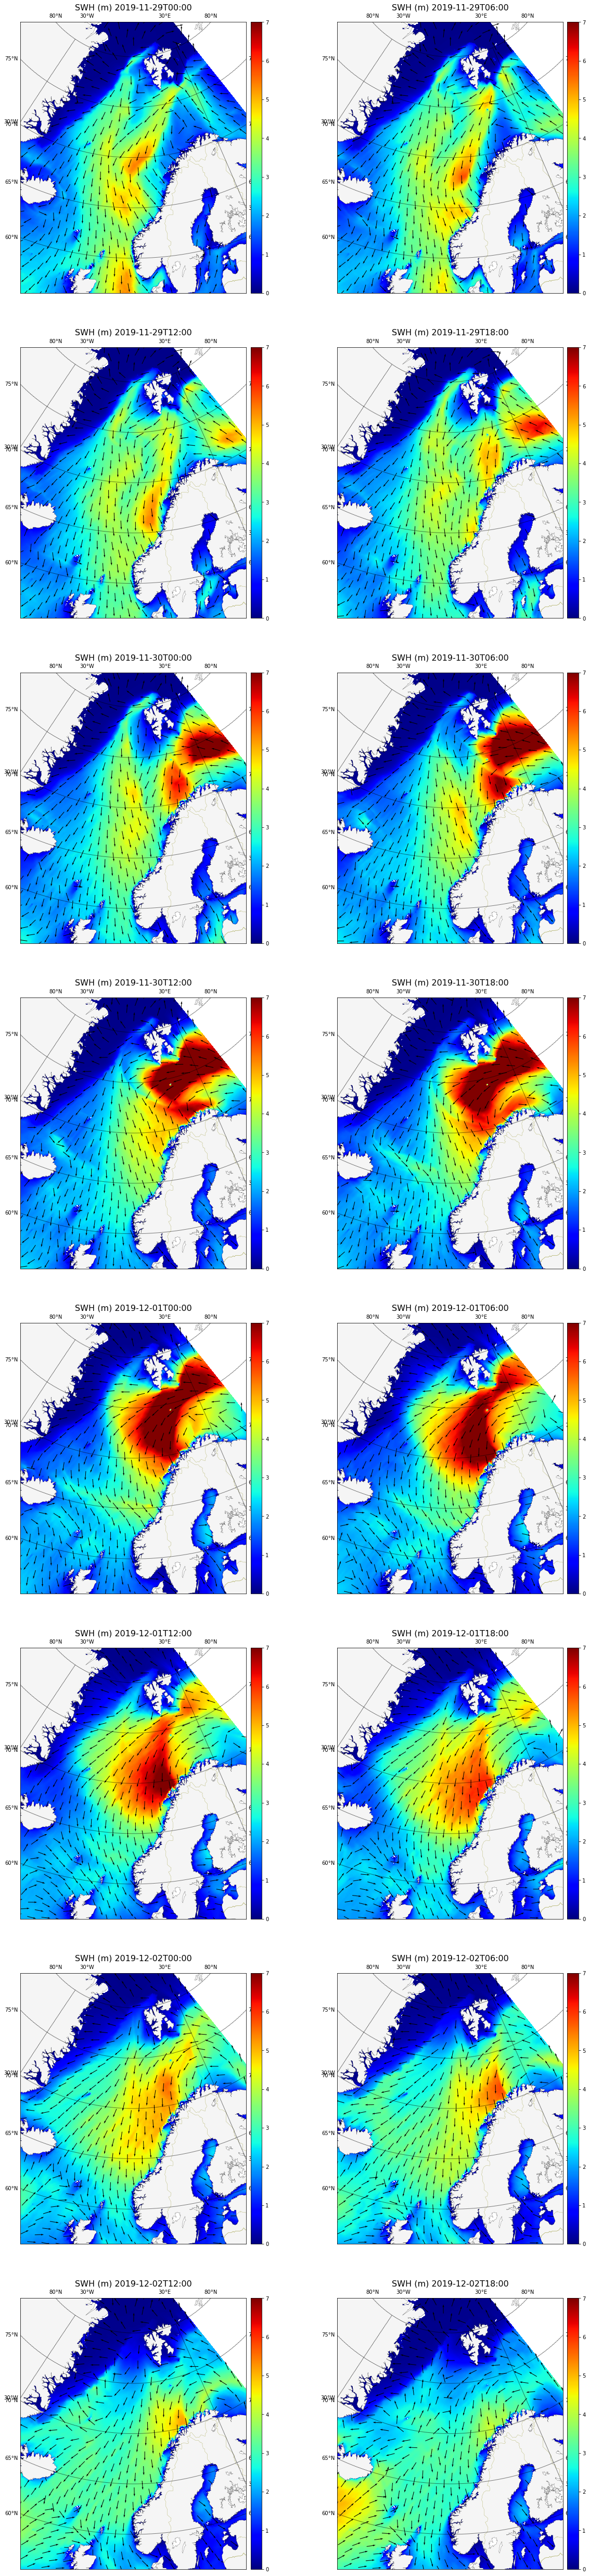

In [6]:
 #### Plot the data on 1 figure with 1 subplot per date ####

# Define the min/max values for the significant wave height
MinVal=0
MaxVal=7

# Reduce the number of points where to plot wave direction arrows to one out of 50
pointstep=40


fig, axes = plt.subplots(8,2, figsize=(20,90))
axes = axes.ravel()

#Loop on the dates to plot the data
for ti in range(int(len(Time)/6)):

    axe=axes[ti] 

    #Basemap instance with stereographic projection
    Map = Basemap(width=2500000,height=3000000,satellite_height=1,projection='stere',  ax=axe, lat_0=70, lon_0=5, resolution='l')
    
    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    Map.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
    Map.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

    # Projection from Lat/Lon to axis X/Y 
    X, Y = Map(Lon, Lat)

    # Plot scalar Var[time_index,lat,lon] 
    # Adjust scale to the min/max values
    P = Map.pcolormesh(Lon,Lat,VarVHM0[ti*6,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=MinVal ,vmax=MaxVal)
    
    #Add wave directions vectors
    
    Map.quiver(X[::pointstep,::pointstep],Y[::pointstep,::pointstep],
               U[ti*6,::pointstep,::pointstep],V[ti*6,::pointstep,::pointstep],
               scale=25)    
    #Add color scale
    Cb = Map.colorbar(P, "right")

    #Title
    date=Time[6*ti].astype('datetime64[m]') #date info used in the title
   
    Title = '{} ({}) {}' '\n'.format(VarVHM0_shortname,VarVHM0.units,date)
    axe.set_title(Title, fontsize=16) 
    
#Save file
FOutName = '{}/plot_{}_with_direction'.format(PathOut,VarVHM0.name)
print('Save file:', FOutName)
#plt.savefig(FOutName)


## 5.4. Gif animation

In this part we are going to display the evolution of the waves during the storm event on a GIF animation. To do this, we are going to use the same file and variables as above, so there is no need to redefine them.

### 5.4.1. Creation of maps
In this section, we plot the hourly significant wave heights on one map for each hour, in order to prepare the files that will be concatanated into the GIF animation. However, we will not display the maps.

First of all, we create the output directory:

In [ ]:
# Create output dir to save plots
PathOut = 'out/GIF'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('Plots folder:', PathOut)

In [ ]:
#### Plot the data on 1 figure per date ####

# Define the min/max values for the significant wave height
MinVal=0
MaxVal=7

#Loop on the dates to plot the data
for ti in range(len(Time)):
    fig, axe = plt.subplots(1,1, figsize=(12,12))

    #Basemap instance with stereographic projection
    Map = Basemap(width=2500000,height=3000000,satellite_height=1,projection='stere',  ax=axe, lat_0=70, lon_0=5, resolution='c')
    
    # Draw coastlines, country boundaries, fill continents.
    Map.drawcoastlines(linewidth=0.25)
    Map.drawcountries(linewidth=0.25, color='olive')
    Map.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    Map.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
    Map.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

    # Adjust scale to the min/max values
    P = Map.pcolormesh(Lon,Lat,VarVHM0[ti,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=MinVal ,vmax=MaxVal)
    
    #Add color scale
    Cb = Map.colorbar(P, "right")

    #Title
    date=Time[ti].astype('datetime64[m]') #date info used in the title
   
    Title = '{} ({}) {}' '\n'.format(VarVHM0_shortname,VarVHM0.units,date)
    axe.set_title(Title, fontsize=16)
    
         
    #Save file
    FOutName = 'out/GIF/plot_{}_{}.png'.format(VarVHM0.name,Time[ti])
    print('Save file:', FOutName)
    plt.savefig(FOutName)
    
    plt.close()

### 5.4.2. GIF animation creation


Now we can build the animation as the succession of the images that we just generated and saved in the previous part.

First of all, we need to import some modules:

In [ ]:
import imageio
from pathlib import Path

In [ ]:
# Search image filesp
image_path = Path('out/GIF/') 
images = sorted(list(image_path.glob('plot_VHM0_2019-*.png'))) # stock all image names in the variable 'image'
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name)) #stock all images in the variable 'image_list'


In [ ]:
# Save the GIF
imageio.mimwrite('out/GIF/animated_storm.gif', image_list,duration=0.25,loop=10) # duration= the time between two images in second

In [ ]:
# Show the GIF 
from IPython.display import Image
with open('out/GIF/animated_storm.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

<div class="alert alert-block alert-info">
In this exercise, we have displayed maps of significant wave height and direction during a storm event, where we could see that the storm came from North East. On the maps of the last time frames of the dataset, we can also notice a second storm coming from South West.
Between Svalbard and the eastern coast of Greenland, we note that the waves are stopped by the presence of sea ice. The sea ice cushions the impact of the waves and we can note that the sea ice limit moves a little over the time but subtantially remains at the same position.

<div class="alert alert-block alert-warning">

<b> TIP </b> 

***Clear the outputs of the previous cell***

The GIF animation is quite big so if you want that the notebook continues to run smoothly, we advise to clear the outputs of the previous cell ("show the GIF").
    
To do so, you just have to click on the cell, then go to the `Edit` button on the upper-left part of the window and finally click on `Clear Outputs`. The video will then disappear.

You can still access the video at the path you defined above ("out/GIF/").

# 6. Exercise 2: Wave evolution during the year 2019 in three points
[Go back to the "Table of contents"](#Table-of-contents)

Since the polar ice surface decreases from year to year, the Arctic Ocean is very concerned by maritime transport with the opening of new route options. We are going to plot the wave conditions with rose and time series at three points:

- Point 1 : longitude = 18.59° -  latitude = 70.75° -> file: dataset-wam-arctic-1hr3km-be_1601988020124.nc
- Point 2 : longitude = 57.72° -  latitude = 70.39° -> file: dataset-wam-arctic-1hr3km-be_1597742527052.nc
- Point 3 : longitude = 99.86° -  latitude = 77.72° -> file: dataset-wam-arctic-1hr3km-be_1597757552880.nc

First, we plot the positions of these three points on a map:

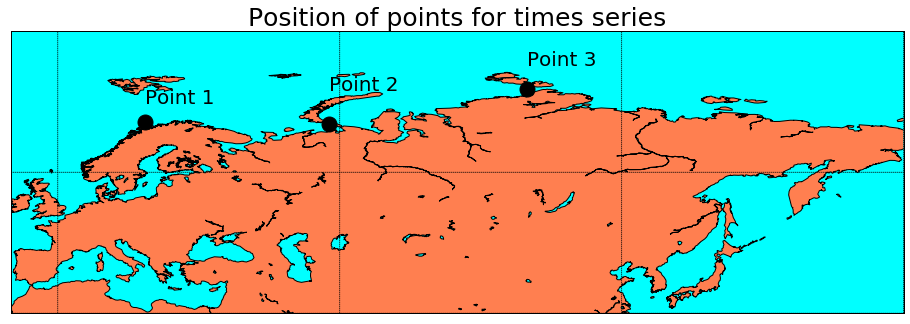

In [85]:
# Coordinate of points
Pts_lon=[18.59, 57.72, 99.86]
Pts_lat=[70.75, 70.39, 77.72] 

# create a the figure
fig,axe = plt.subplots(1,1, figsize=(16,88)) # 16 is width, 16 is height
m = Basemap(projection='cyl',llcrnrlat=30,urcrnrlat=90,\
            llcrnrlon=-10,urcrnrlon=180,resolution='l')
axe.plot(Pts_lon, Pts_lat, '.',marker='o', color='black', markersize=15)

# put the name of each point
plt.text(Pts_lon[0],Pts_lat[0]+4,'Point 1', fontsize=20)
plt.text(Pts_lon[1],Pts_lat[1]+7,'Point 2', fontsize=20)
plt.text(Pts_lon[2],Pts_lat[2]+5,'Point 3', fontsize=20)

# draw parallels and meridians.
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Position of points for times series", Fontsize=25)

plt.show()

## 6.1. Import module

To plot the wave roses, we need first to import a module called `windrose`:

In [7]:
import windrose

## 6.2. Select the netCDF file and variable name

In this exercise, we will have a closer look at the **significant wave height**, the **wave direction** and the **sea ice thickness** variables, which were all downloaded at the three considered points: 

- **VHM0**: Spectral significant wave height (**Hm0**)
- **VMDR**: Mean wave direction from (Mdir)
- **SIT**: Sea Ice Thickness

To map the data we need to define:
- `VarName`: the name of the variable of interest in the netCDF file
- `VarShortName`: The short name of the variable, to put in the map title

In [13]:
### Open the NetCDF file and select the variables

## Define the path of the file to open 
RootPath = 'data/'

#### Wave model file
### If you want to work with point 1, comment the second and the third lines

#FName = RootPath + 'dataset-wam-arctic-1hr3km-be_1601988020124.nc'  # Point 1
#FName = RootPath + 'dataset-wam-arctic-1hr3km-be_1597742527052.nc'  # Point 2
FName = RootPath + 'dataset-wam-arctic-1hr3km-be_1597757552880.nc' # Point 3

print(FName)

## Define the name of the variables of interest for the exercise

VarNameVHM0='VHM0'
VarNameWDir='VMDR'
VarNameSIT='SIT'

## Open the netCDF file with xr.open_dataset and store the dataset in FIn
FIn = xr.open_dataset(FName);

## Store the variables of interest in individual arrays
#Get the variable VarName and associated coordinates and attributes
VarVHM0=FIn[VarNameVHM0]
VarWDir=FIn[VarNameWDir]
VarSit=FIn[VarNameSIT]

## Define short names for the variables
VarVHM0_shortname='SWH'

# Define latitude and longitude in a variable
LAT=np.squeeze(FIn['lat'])
LON=np.squeeze(FIn['lon'])
TIME=FIn['time']

## Close the FIn dataset to free memory
FIn.close()


data/dataset-wam-arctic-1hr3km-be_1597757552880.nc


## 6.3. Set the configuration

Creation of the output directory:

In [9]:
# Create output dir to save plots
PathOut = 'out/Plots_rose_hourly'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('Plots folder:', PathOut)

Plots folder: out/Plots_rose_hourly


Creation of the input for the windrose function:

In [10]:
# Set the "Significant Wave height" plot parameters
hs_min = 0.5
hs_max = 4
hs_step = 1

# Set the numbers of bins (limits) for hs.
bin_hs = np.arange(hs_min, hs_max, hs_step)

# Set numbers of bins for directions (directions “boundaries”) 
bin_dir = 20 # 360 degrees/20 = 18 degrees each

In [11]:
# Extract wave height and wave direction
dir_sel= np.squeeze(VarWDir.astype(int))
hs_sel = np.squeeze(VarVHM0.round(2))

dir_sel=dir_sel.transpose()
hs_sel=hs_sel.transpose()

## 6.4. Plot the wave rose 

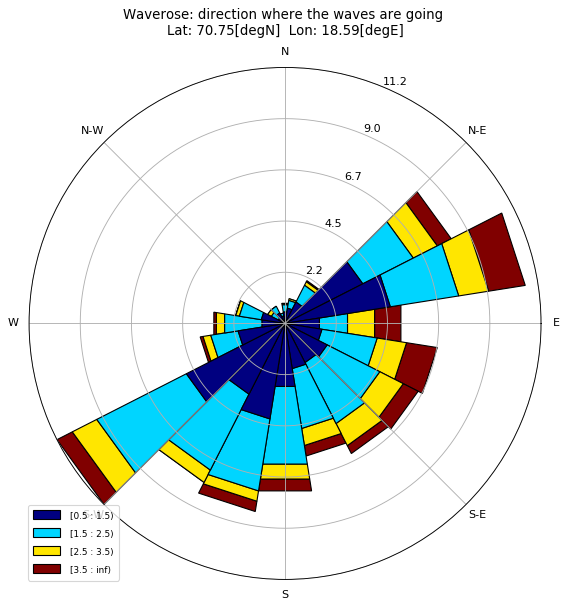

Save file: out/Waverose_lat=70.75323885346349_Lon=18.589128772375886_2019.png


In [12]:
# Plot waverose

ax = windrose.WindroseAxes.from_ax()
im1=ax.bar(dir_sel,hs_sel, bins=bin_hs, nsector=bin_dir, normed=True, opening=1, edgecolor='k')

# legend
ax.legend(title='Hs')
ax.set_legend(prop={'size': 'large'})

## Title
title = 'Waverose: direction where the waves are going \n' \
         'Lat: {:0.2f}[degN]  Lon: {:0.2f}[degE]'.format(LAT.data ,  LON.data)  
plt.title(title)

plt.show()

# Save file
FOutName = 'out/Waverose_lat={}_Lon={}_2019.png'.format(LAT.data,LON.data)
print('Save file:', FOutName)
#plt.savefig(FOutName)

## Look at the data

After plotting the rose, you can have a look at the frequency values used by windrose and generated by the plot function (`ax._info` property):

In [94]:
# this command shows the caracteristics of the waverose
waverose_info = ax._info['table']

# to know the dimension of the variable (waverose_info)
waverose_info.shape

(4, 20)

This table has dimensions `bin_hs.size` x `bin_dir.size`.

In [95]:
info=pd.DataFrame(waverose_info)
info # to see what is in the variable info

0         1         2         3         4         5         6  \
0  0.504935  0.677071  1.055772  3.832913  4.682121  1.526280  1.641037   
1  0.321322  0.344274  0.826257  2.490246  3.041083  1.250861  2.455818   
2  0.057379  0.080331  0.172137  1.182006  1.331191  1.204958  1.308240   
3  0.011476  0.000000  0.057379  0.688547  1.629562  1.170530  1.365619   

          7         8         9        10        11        12        13  \
0  2.077117  1.927932  2.008263  2.800092  4.246041  3.488639  4.865733   
1  2.593528  3.006656  2.662382  3.454212  3.201744  3.741106  4.418178   
2  1.159054  1.090200  0.757402  0.665596  0.459031  0.608217  1.204958   
3  0.734450  0.390177  0.470507  0.527886  0.459031  0.000000  0.757402   

         14        15        16        17        18        19  
0  2.088593  1.021345  1.055772  0.332798  0.516410  0.332798  
1  1.216433  1.663989  0.975442  0.344274  0.332798  0.126234  
2  0.344274  0.367225  0.160661  0.183613  0.000000  0.000000  
3  0.126234  0.114758  0.011476  0.000000  0.000000  0.000000



You can also print a table for all the data of Significant Wave height and Direction used to generate the plot:

In [96]:
# Show the table
pd.DataFrame({"Time": hs_sel.time, "SWH": hs_sel, "Direction": dir_sel })


Time   SWH  Direction
0    2019-01-01 00:00:00  2.38        277
1    2019-01-01 01:00:00  2.44        284
2    2019-01-01 02:00:00  2.60        289
3    2019-01-01 03:00:00  2.84        289
4    2019-01-01 04:00:00  3.12        284
...                  ...   ...        ...
8755 2019-12-31 19:00:00  3.59        102
8756 2019-12-31 20:00:00  3.48        103
8757 2019-12-31 21:00:00  3.37        104
8758 2019-12-31 22:00:00  3.29        105
8759 2019-12-31 23:00:00  3.21        105

[8760 rows x 3 columns]

### Save the data in csv file format

In [97]:
# Save the table of the variable "info"

FOutName = 'out/windrose_data_Lat={}_Lon={}.csv'.format(LAT.data,LON.data)
info.to_csv(FOutName )

The .csv file is in this following path:

In [98]:
print(FOutName)

out/windrose_data_Lat=70.75323885346349_Lon=18.589128772375886.csv


## 6.5. Plot the time series

We are going to plot time series to analyze the evolution of the significant wave height and the sea ice thickness during the year 2019.

First, we create the output directory to save plots:

In [92]:
# Create output dir to save plots
PathOut = 'out/Plots_time_serie_hourly'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('Plots folder:', PathOut)

Plots folder: out/Plots_time_serie_hourly


We will display a figure with the **SIT (Sea Ice Thickness) and VHM0 (significant wave height) variables**:

out/Plots_rose_hourly/Spectral_significant_wave_height_and_sea_ice_thickness
_Lat:_77.72[degN]__Lon:_99.86[degE].png


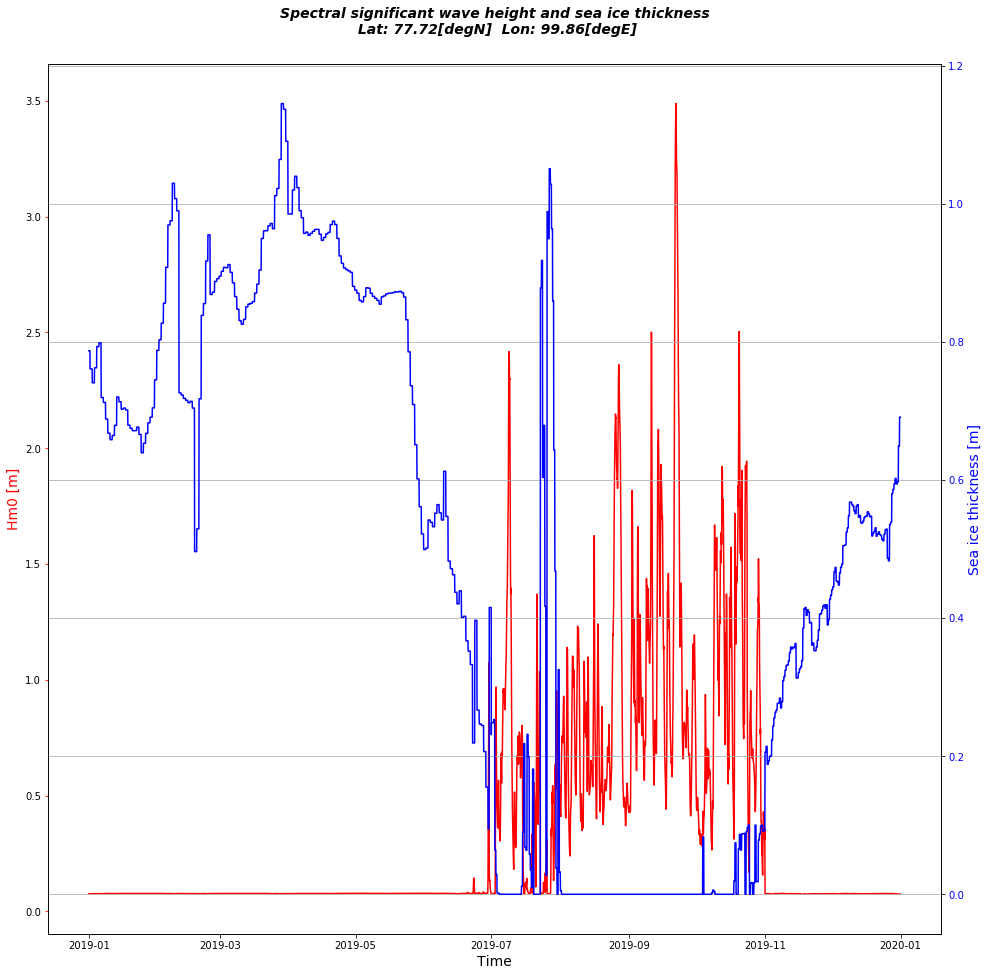

In [14]:
fig, axes = plt.subplots(1,1, figsize=(16,16)) 

# Inputs
color1 = 'r'
color2 = 'b'

# Variables
sig1=np.squeeze(VarVHM0)
sig2 = np.squeeze(VarSit)
timesteps=np.squeeze(TIME)

# plot time evolution of wave height
axes.plot(timesteps, sig1,color=color1)
axes.set_ylabel('Hm0 [m]', fontsize=14, color=color1)
axes.set_xlabel("Time", fontsize=14)
axes.tick_params(axis='y', color=color1)

# plot time evolution of sea ice thickness
ax2 = axes.twinx()
ax2.plot(timesteps, sig2, color2)
ax2.set_ylabel("Sea ice thickness [m]", fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# title
var_title = "Spectral significant wave height and sea ice thickness"

title_fontstyle = {"fontsize": "14","fontstyle": "italic","fontweight": "bold","pad": 30}

title = '{}\n Lat: {:0.2f}[degN]  Lon: {:0.2f}[degE]'.format(var_title,  LAT.data ,  LON.data)

plt.title(title, **title_fontstyle)

plt.grid()
#plt.show()


# output file
output_file = os.path.join(PathOut,title.replace(' ','_')) + ".png"
print(output_file)
# save the output file
#plt.savefig(output_file)



<div class="alert alert-block alert-info">
We can clearly see the dependency between the wave heights and the sea ice, with very low waves when there is sea ice in the region, and stronger waves in the absence of sea ice.

At point 3, which is located in sea-ice free waters all year long, we can also notice a clear seasonal signal in the significant wave heights, with larger waves during the Winter period (characterized by more storm events) and lower waves in Summer.

# 7. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### And thank you for your attention! :) We hope you enjoyed this training on the Arctic Wave model data provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### Now let's try to download new data and variables and to access and visualize them. You can try to make new maps and plots. And don't forget to try to the other [Copernicus Marine Arctic products](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&task=results)!

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 